In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
clf = linear_model.LinearRegression()
import statsmodels.api as sm
import re

In [2]:
from sktime.datasets import load_airline
airline = load_airline()
airline=pd.DataFrame(airline)
airline.reset_index(inplace=True)
airline['Period']=[int(i.year)for i in airline['Period']]
airline.head(30)

,Period,Number of airline passengers
0,1949,112.0
1,1949,118.0
2,1949,132.0
3,1949,129.0
4,1949,121.0
5,1949,135.0
6,1949,148.0
7,1949,148.0
8,1949,136.0
9,1949,119.0


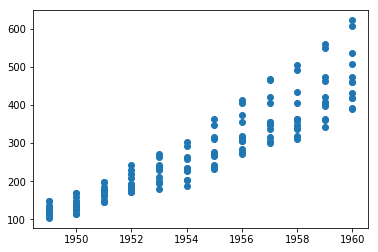

In [3]:
plt.scatter(x=airline['Period'],y=airline['Number of airline passengers'])

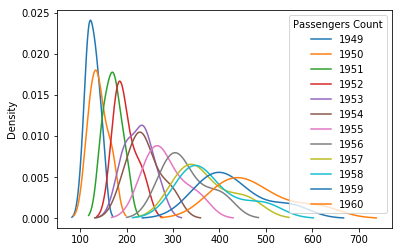

In [4]:
airline.groupby('Period')['Number of airline passengers'].plot(kind='kde')#given years Class
plt.legend([int(i) for i in airline.groupby('Period')['Number of airline passengers'].count().index.values], title='Passengers Count')

1945    AxesSubplot(0.125,0.125;0.775x0.755)
1950    AxesSubplot(0.125,0.125;0.775x0.755)
1955    AxesSubplot(0.125,0.125;0.775x0.755)
1960    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Number of airline passengers, dtype: object

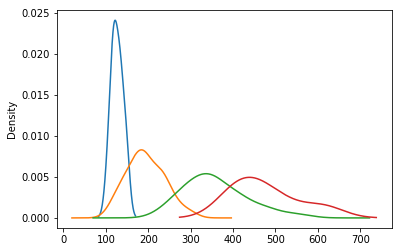

In [5]:
airline['Number of airline passengers'].groupby((airline['Period'].values//5)*5).plot(kind='kde')#5 years Class

In [6]:
airline['Number of airline passengers'].groupby((airline['Period'].values//5)*5).sum()

1945     1520.0
1950    11649.0
1955    21480.0
1960     5714.0
Name: Number of airline passengers, dtype: float64

In [7]:
airline['Period'].groupby((airline['Number of airline passengers'].values//5)*5).sum()

100.0    1949
110.0    3899
115.0    7797
120.0    1949
125.0    5849
         ... 
535.0    1960
545.0    1959
555.0    1959
605.0    1960
620.0    1960
Name: Period, Length: 63, dtype: int64

In [8]:
pd.DataFrame(airline['Number of airline passengers'].groupby((airline['Period'].values//5)*5))

,0,1
0,1945,0 112.0 1 118.0 2 132.0 3 129....
1,1950,12 115.0 13 126.0 14 141.0 15 135....
2,1955,72 242.0 73 233.0 74 267.0 75 ...
3,1960,132 417.0 133 391.0 134 419.0 135 ...


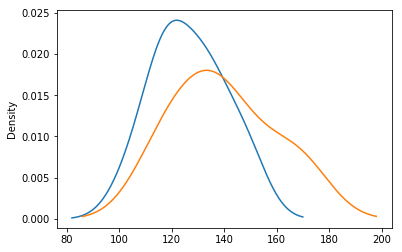

In [9]:
pd.DataFrame(airline.groupby('Period')['Number of airline passengers']).values[0][1].plot(kind='kde')
pd.DataFrame(airline.groupby('Period')['Number of airline passengers']).values[1][1].plot(kind='kde')

In [10]:
#We can see the data is poissonally Distributed data
X =airline[['Period']]
y =airline['Number of airline passengers']
X

,Period
0,1949
1,1949
2,1949
3,1949
4,1949
...,...
139,1960
140,1960
141,1960
142,1960


In [11]:
clf.fit(X, y)

LinearRegression()

In [12]:
clf.coef_

array([31.92395105])

In [13]:
clf.intercept_

-62115.063714063734

In [14]:
X

,Period
0,1949
1,1949
2,1949
3,1949
4,1949
...,...
139,1960
140,1960
141,1960
142,1960


In [15]:
y_pred=clf.predict(X)
y_pred

array([104.71688034, 104.71688034, 104.71688034, 104.71688034,
       104.71688034, 104.71688034, 104.71688034, 104.71688034,
       104.71688034, 104.71688034, 104.71688034, 104.71688034,
       136.64083139, 136.64083139, 136.64083139, 136.64083139,
       136.64083139, 136.64083139, 136.64083139, 136.64083139,
       136.64083139, 136.64083139, 136.64083139, 136.64083139,
       168.56478244, 168.56478244, 168.56478244, 168.56478244,
       168.56478244, 168.56478244, 168.56478244, 168.56478244,
       168.56478244, 168.56478244, 168.56478244, 168.56478244,
       200.48873349, 200.48873349, 200.48873349, 200.48873349,
       200.48873349, 200.48873349, 200.48873349, 200.48873349,
       200.48873349, 200.48873349, 200.48873349, 200.48873349,
       232.41268454, 232.41268454, 232.41268454, 232.41268454,
       232.41268454, 232.41268454, 232.41268454, 232.41268454,
       232.41268454, 232.41268454, 232.41268454, 232.41268454,
       264.33663559, 264.33663559, 264.33663559, 264.33

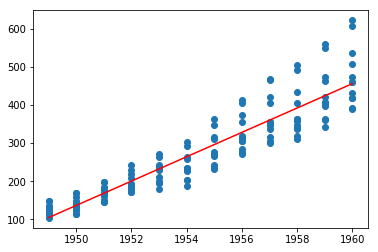

In [16]:
plt.scatter(x=airline['Period'],y=airline['Number of airline passengers'])
plt.plot(X,y_pred,color='r')

In [17]:
exog = sm.add_constant(X)

In [18]:
poission_model = sm.GLM(y, exog, family=sm.families.Poisson())
result = poission_model.fit()

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                       
========================================================================================
Dep. Variable:     Number of airline passengers   No. Observations:                  144
Model:                                      GLM   Df Residuals:                      142
Model Family:                           Poisson   Df Model:                            1
Link Function:                              log   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -969.63
Date:                          Sun, 28 May 2023   Deviance:                       876.43
Time:                                  20:18:41   Pearson chi2:                     897.
No. Iterations:                               4   Pseudo R-squ. (CS):              1.000
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -224.3926      2.961    -75.781      0.000    -230.196    -218.589
Period         0.1177      0.002     77.711      0.000       0.115       0.121
==============================================================================
"""

In [20]:
poisson_training_results = sm.GLM(y, X, family=sm.families.Poisson()).fit()

In [21]:
poisson_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                       
========================================================================================
Dep. Variable:     Number of airline passengers   No. Observations:                  144
Model:                                      GLM   Df Residuals:                      143
Model Family:                           Poisson   Df Model:                            0
Link Function:                              log   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -3983.8
Date:                          Sun, 28 May 2023   Deviance:                       6904.9
Time:                                  20:18:41   Pearson chi2:                 7.01e+03
No. Iterations:                               4   Pseudo R-squ. (CS):             0.8854
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Period         0.0029   2.55e-06   1132.805      0.000       0.003       0.003
==============================================================================
"""

In [22]:
y_pred=poisson_training_results.get_prediction(X)

In [23]:
print(y_pred)

In [24]:
predictions_summary_frme = y_pred.summary_frame()
predictions_summary_frme

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,276.060865,1.369727,273.389261,278.758577
1,276.060865,1.369727,273.389261,278.758577
2,276.060865,1.369727,273.389261,278.758577
3,276.060865,1.369727,273.389261,278.758577
4,276.060865,1.369727,273.389261,278.758577
...,...,...,...,...
139,284.958542,1.421854,282.185341,287.758997
140,284.958542,1.421854,282.185341,287.758997
141,284.958542,1.421854,282.185341,287.758997
142,284.958542,1.421854,282.185341,287.758997


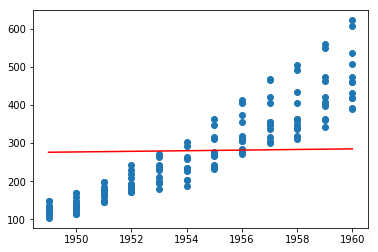

In [25]:
plt.scatter(np.array(airline['Period']),np.array(airline['Number of airline passengers']))
plt.plot(np.array(X),np.array(predictions_summary_frme['mean']),color='r')

In [26]:
df=pd.read_csv('bangladesh-gdp-gross-domestic-product.csv')
df['date']=pd.to_datetime(df['date'])
df['date']=[int(i.year)for i in df['date']]

In [27]:
df.columns

Index(['date', ' GDP ( Billions of US $)', ' Per Capita (US $)',
       ' Annual % Change'],
      dtype='object')

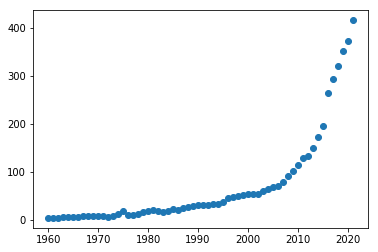

In [28]:
plt.scatter(x=df['date'],y=df[' GDP ( Billions of US $)'])

1960    AxesSubplot(0.125,0.125;0.775x0.755)
1980    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
Name:  GDP ( Billions of US $), dtype: object

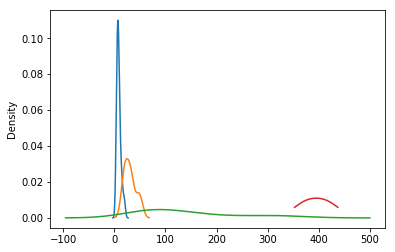

In [29]:
df[' GDP ( Billions of US $)'].groupby((df['date'].values//20)*20).plot(kind='kde')#5 years Class

In [30]:
#We can see the data is poissonally Distributed data
X =df[['date']]
y =df[' GDP ( Billions of US $)']
X

,date
0,1960
1,1961
2,1962
3,1963
4,1964
...,...
57,2017
58,2018
59,2019
60,2020


In [31]:
clf.fit(X, y)

LinearRegression()

In [32]:
y_pred=clf.predict(X)
y_pred

array([-59.01588312, -54.75163943, -50.48739573, -46.22315203,
       -41.95890834, -37.69466464, -33.43042095, -29.16617725,
       -24.90193356, -20.63768986, -16.37344617, -12.10920247,
        -7.84495877,  -3.58071508,   0.68352862,   4.94777231,
         9.21201601,  13.4762597 ,  17.7405034 ,  22.0047471 ,
        26.26899079,  30.53323449,  34.79747818,  39.06172188,
        43.32596557,  47.59020927,  51.85445296,  56.11869666,
        60.38294036,  64.64718405,  68.91142775,  73.17567144,
        77.43991514,  81.70415883,  85.96840253,  90.23264623,
        94.49688992,  98.76113362, 103.02537731, 107.28962101,
       111.5538647 , 115.8181084 , 120.0823521 , 124.34659579,
       128.61083949, 132.87508318, 137.13932688, 141.40357057,
       145.66781427, 149.93205796, 154.19630166, 158.46054536,
       162.72478905, 166.98903275, 171.25327644, 175.51752014,
       179.78176383, 184.04600753, 188.31025123, 192.57449492,
       196.83873862, 201.10298231])

In [33]:
exog = sm.add_constant(X)
poission_model = sm.GLM(y, exog, family=sm.families.Poisson())
result = poission_model.fit()

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:      GDP ( Billions of US $)   No. Observations:                   62
Model:                                  GLM   Df Residuals:                       60
Model Family:                       Poisson   Df Model:                            1
Link Function:                          log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -258.34
Date:                      Sun, 28 May 2023   Deviance:                       186.37
Time:                              20:18:42   Pearson chi2:                     194.
No. Iterations:                           6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -160.4790      2.721    -58.985      0.000    -165.811    -155.147
date           0.0823      0.001     60.798      0.000       0.080       0.085
==============================================================================
"""

In [35]:
y_pred=poisson_training_results.get_prediction(X)

In [36]:
predictions_summary_frme = y_pred.summary_frame()
predictions_summary_frme

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,284.958542,1.421854,282.185341,287.758997
1,285.781506,1.426688,282.998884,288.591488
2,286.606846,1.431538,283.814772,289.426388
3,287.434570,1.436404,284.633012,290.263703
4,288.264684,1.441286,285.453611,291.103440
...,...,...,...,...
57,335.869633,1.724622,332.506387,339.266897
58,336.839628,1.730461,333.465006,340.248401
59,337.812425,1.736318,334.426388,341.232745
60,338.788031,1.742195,335.390541,342.219936


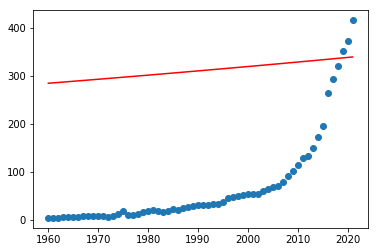

In [37]:
plt.scatter(np.array(df['date']),np.array(df[' GDP ( Billions of US $)']))
plt.plot(np.array(X),np.array(predictions_summary_frme['mean']),color='r')
plt.show()